# Importing Libraries

In [1]:
import rasterio
import matplotlib.pyplot as plt

In [2]:
from rasterio.plot import show


In [151]:
from lightning.pytorch import Trainer
from torch.utils.data import DataLoader

from torchgeo.datamodules import InriaAerialImageLabelingDataModule
from torchgeo.datasets import CDL, Landsat7, Landsat8, VHR10, stack_samples, Sentinel
from torchgeo.samplers import RandomGeoSampler
from torchgeo.trainers import SemanticSegmentationTask

In [4]:
import xarray as xr

### Importing LandSAT8 data - Downloaded from the USGS website

In [16]:
# landsat7 = Landsat7(root="", bands=["B1", ..., "B7"])
landsat8 = Landsat8(root="..\\Data\\Remote Sensing\\LandSat\\Iowa", bands=["B1", "B2", "B3", "B4", "B5", "B6", "B7"])
landsat = landsat8

### Creating a datasampler for the downloaded data

In [121]:
sampler = RandomGeoSampler(landsat8, size=256, length=30)

In [122]:
sample = next(iter(sampler))
sample

BoundingBox(minx=560209.1354137659, maxx=567889.1354137659, miny=3585405.738056302, maxy=3593085.738056302, mint=1671908400.0, maxt=1671994799.999999)

#### Loading 256x256 patches from the datasampler

Sample is a dictionary with the following keys:
- 'image': A tensor of shape (256, 256, 7) containing the image
- 'BoundingBox'
- 'crs'

In [123]:
img_sample = landsat[sample]
img_sample

{'crs': CRS.from_epsg(32615),
 'bbox': BoundingBox(minx=560209.1354137659, maxx=567889.1354137659, miny=3585405.738056302, maxy=3593085.738056302, mint=1671908400.0, maxt=1671994799.999999),
 'image': tensor([[[ 8480.,  8714.,  8708.,  ...,  8038.,  7826.,  7889.],
          [ 8471.,  8581.,  8731.,  ...,  8089.,  7997.,  8161.],
          [ 8592.,  8570.,  8658.,  ...,  8162.,  8358.,  8655.],
          ...,
          [ 8265.,  8496.,  8482.,  ...,  7687.,  7610.,  7643.],
          [ 8244.,  8817.,  8763.,  ...,  7785.,  7606.,  7710.],
          [ 8198.,  8912.,  9047.,  ...,  7922.,  7669.,  7701.]],
 
         [[ 8660.,  8936.,  8936.,  ...,  8180.,  7943.,  7914.],
          [ 8724.,  8836.,  8987.,  ...,  8225.,  8086.,  8234.],
          [ 8824.,  8800.,  8928.,  ...,  8263.,  8541.,  8874.],
          ...,
          [ 8396.,  8689.,  8666.,  ...,  7776.,  7679.,  7727.],
          [ 8345.,  9202.,  9146.,  ...,  7915.,  7692.,  7771.],
          [ 8387.,  9341.,  9464.,  ..., 

In [124]:
img_sample.keys()

dict_keys(['crs', 'bbox', 'image'])

### Shape of image

In [125]:
img_sample['image'].shape

torch.Size([7, 256, 256])

### Scaling images

In [126]:
def scale_image(item: dict):
    item['image'] = item['image'] * 0.0001
    return item

In [127]:
img_sample = scale_image(img_sample)

### Taking out RGB bands 3 - R, 2 - G, 1 - B

In [128]:
rgb = img_sample['image'][[3, 2, 1], :, :, ]

In [129]:
# convert rgb tensor to numpy array
rgb = rgb.numpy()


In [130]:
rgb = rgb.transpose(1, 2, 0)
rgb.shape


(256, 256, 3)

In [137]:
# clamp values to range [0, 1]
import numpy as np
rgb = np.clip(rgb, 0, 255)

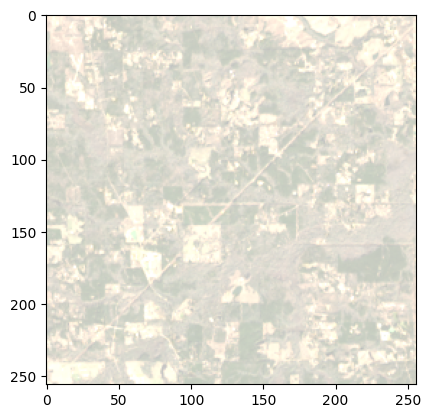

In [138]:
plt.imshow(rgb)

### TODO LIST:
- [x] Download Landsat8 data
- [x] Create a datasampler for the downloaded data
- [x] Load 256x256 patches from the datasampler
- [x] Scale images
- [x] Take out RGB bands 3 - R, 2 - G, 1 - B to plot
- [] Download Crop Data Layer (CDL) data
- [] Download more Landsat8 data
- [] Merge CDL data with Landsat8 data using TorchGeo's & operator
- [] Create a dataloader
- [] Create a model

In [5]:
img = xr.open_rasterio('..\Data\Remote Sensing\itqan.tif')

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\rasterio\__init__.py:320: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [15]:
img

<xarray.DataArray (band: 3, y: 1425, x: 2304)>
[9849600 values with dtype=uint8]
Coordinates:
  * band     (band) int32 1 2 3
  * y        (y) float64 0.5 1.5 2.5 3.5 ... 1.422e+03 1.424e+03 1.424e+03
  * x        (x) float64 0.5 1.5 2.5 3.5 ... 2.302e+03 2.302e+03 2.304e+03
Attributes:
    transform:               (1.0, 0.0, 0.0, 0.0, 1.0, 0.0)
    res:                     (1.0, 1.0)
    is_tiled:                0
    nodatavals:              (nan, nan, nan)
    scales:                  (1.0, 1.0, 1.0)
    offsets:                 (0.0, 0.0, 0.0)
    TIFFTAG_RESOLUTIONUNIT:  2 (pixels/inch)
    TIFFTAG_XRESOLUTION:     300
    TIFFTAG_YRESOLUTION:     300

In [ ]:
Sentinel()
# USE IF LANDSAT DOES NOT WORK

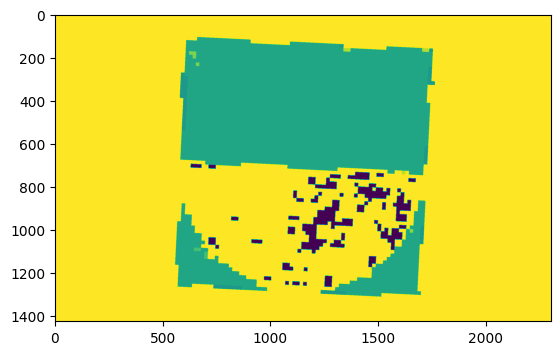

In [31]:
import rasterio
from matplotlib import pyplot
src = rasterio.open("..\Data\Remote Sensing\itqan.tif")
pyplot.imshow(src.read(1))
pyplot.show()